This project was goten from Kaggle

Mental health has always been the central topic around workplace culture and wellness conversations. In a study of "mental well-being at the workplace" in 2010, it is increasingly recognized that employees' mental health is a crucial determinant in their overall health. Poor mental health and stressors at the workplace can contribute to a range of physical illnesses. Mental health can also affect their personal and professional lives (Rajgopal). Furthermore, mental issues such as depression and anxiety have a significant economic impact; the estimated cost to the global economy is US$1 trillion per year in lost productivity (who.int)
The dataset is about the attitudes towards mental health and frequency of mental health disorders

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset
hd = pd.read_csv(r'C:\Users\bolaj\Downloads\survey.csv')

In [3]:
hd.head(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


In [4]:
#this gives inforation about the data types, null values and all other characteristics
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [5]:
#checking out the column titles
hd.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

#### CLEANING THE AGE COLUMN

In [6]:
hd.Gender.unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [7]:
#data = hd

In [8]:
Male = ["M", "male","Male","m","maile", "something kinda male?","Male-ish","Cis Male",
        "Mal","Guy (-ish) ^_^","Male ",'Make','cis male',"Male (CIS)","Man","msle","Mail",'Cis Man',"Malr"]
Female = [ "F" ,"f",'Female ','woman','female','cis-female/femme','Female (cis)', "Femake","Cis Female", "Woman","femail"]
Others = ["Trans-female","queer/she/they","non-binary", "All",'Nah',"Enby","fluid",'Neuter', 'Female (trans)',
       'queer','Trans woman','male leaning androgynous',"Genderqueer","Androgyne","Agender",'ostensibly male, unsure what that really means']

In [9]:
hd.replace(to_replace = Male,value='Male', inplace=True )
hd.replace(to_replace = Female,value='Female', inplace=True )
hd.replace(to_replace = Others, value = 'Others', inplace=True )

In [10]:
#array(['Female', 'Male', 'female', 'Others', 'F', 'something kinda male?',
 #      'f', 'woman', 'Make', 'Nah', 'Female ', 'Female (cis)', 'cis male',
 #      'A little about you', 'p', 'Cis Man'], dtype=object)

In [11]:
hd.drop([989, 1127], inplace=True)

In [12]:
hd.Gender.unique()

array(['Female', 'Male', 'Others'], dtype=object)

In [13]:
#to get the index number of a little about you row
#index = hd.index
#condition = hd["Gender"]=="A little about you"
#little_indices = index[condition]
#little_indices_list = little_indices.tolist()
#print(little_indices_list)

#### CLEANING THE AGE COLUMN

In [14]:
hd.Age.describe()

count    1.257000e+03
mean     7.955453e+07
std      2.820541e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Age, dtype: float64

In [15]:
hd.Age.max()

99999999999

In [16]:
hd.Age.min()

-1726

In [17]:
#to get the index number of age 9999999999 row
index = hd.index
condition = hd["Age"]==99999999999
age_indices = index[condition]
age_indices_list = age_indices.tolist()
print(age_indices_list)

[390]


In [18]:
#filtering ages that are less than 11 and greater than 100
hd= hd[(hd.Age>11) & (hd.Age <=100)]
hd.head


<bound method NDFrame.head of                 Timestamp  Age  Gender         Country state self_employed  \
0     2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1     2014-08-27 11:29:37   44    Male   United States    IN           NaN   
2     2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3     2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4     2014-08-27 11:30:22   31    Male   United States    TX           NaN   
...                   ...  ...     ...             ...   ...           ...   
1254  2015-09-12 11:17:21   26    Male  United Kingdom   NaN            No   
1255  2015-09-26 01:07:35   32    Male   United States    IL            No   
1256  2015-11-07 12:36:58   34    Male   United States    CA            No   
1257  2015-11-30 21:25:06   46  Female   United States    NC            No   
1258  2016-02-01 23:04:31   25    Male   United States    IL            No   

     family_history treatment wor

In [19]:
hd.describe()

,Age
count,1251.000000
mean,32.076739
std,7.288272
min,18.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,72.000000


In [20]:
hd

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,Male,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,Male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,Male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,Female,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


#### CLEANING THE COUNTRY

In [21]:
hd.Country.unique()

array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand', 'Spain',
       'Finland', 'Uruguay', 'Israel', 'Bosnia and Herzegovina',
       'Hungary', 'Singapore', 'Japan', 'Nigeria', 'Croatia', 'Norway',
       'Thailand', 'Denmark', 'Greece', 'Moldova', 'Georgia', 'China',
       'Czech Republic', 'Philippines'], dtype=object)

In [22]:
hd.state.unique()

array(['IL', 'IN', nan, 'TX', 'TN', 'MI', 'OH', 'CA', 'CT', 'MD', 'NY',
       'NC', 'MA', 'IA', 'PA', 'WA', 'WI', 'UT', 'NM', 'OR', 'FL', 'MN',
       'MO', 'AZ', 'CO', 'GA', 'DC', 'NE', 'WV', 'OK', 'KS', 'VA', 'NH',
       'KY', 'AL', 'NV', 'NJ', 'SC', 'VT', 'SD', 'ID', 'MS', 'RI', 'WY',
       'LA', 'ME'], dtype=object)

In [63]:
hd.drop('comments', axis = 1, inplace=True)

In [24]:
hd.anonymity.unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [25]:
hd.drop('Timestamp', axis=1, inplace = True)

In [26]:
hd.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,44,Male,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


<AxesSubplot:xlabel='Gender', ylabel='count'>

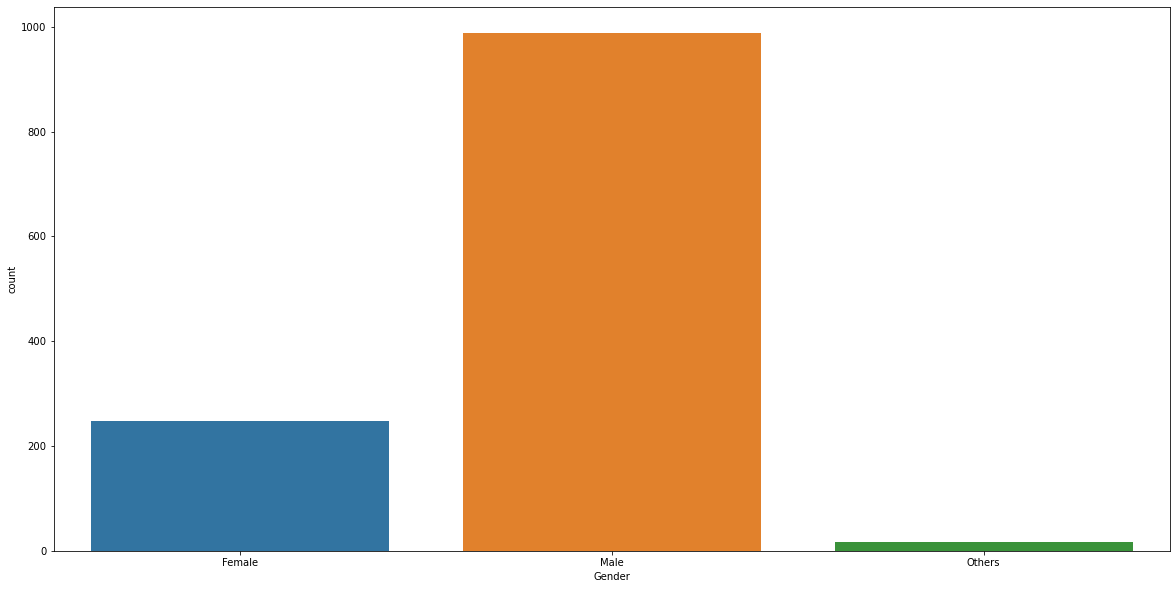

In [27]:
plt.subplots(figsize=(20,10))
sns.countplot(x=hd['Gender'])


Text(0, 0.5, 'Count')

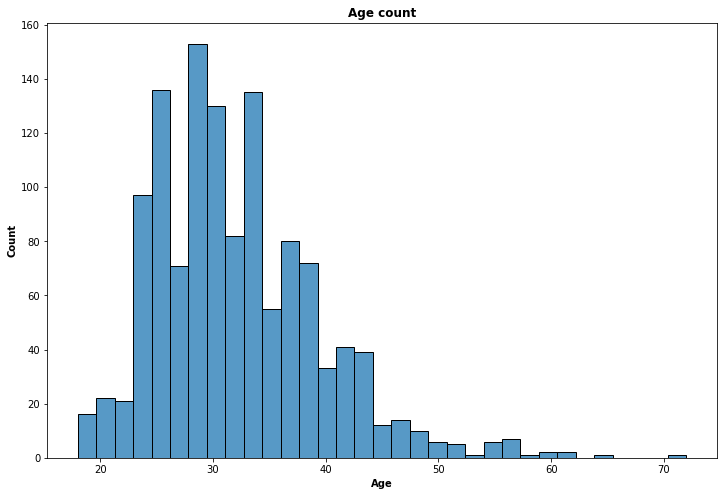

In [28]:
plt.figure(figsize=(12,8))
sns.histplot(data=hd, x='Age')
plt.title('Age count', fontweight='bold')
plt.xlabel('Age',fontweight='bold')
plt.ylabel('Count', fontweight=('bold'))

In [29]:
data = hd.copy()

In [30]:
data.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,44,Male,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [31]:
data.dtypes

Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [32]:
#obj_data=data.select_dtypes(include=['object'])
#obj.data.head()

In [33]:
hd.self_employed.unique()

array([nan, 'Yes', 'No'], dtype=object)

In [34]:
data.self_employed.unique()

array([nan, 'Yes', 'No'], dtype=object)

In [35]:
#replacing nan with no
data['self_employed'].value_counts()

No     1091
Yes     142
Name: self_employed, dtype: int64

In [36]:
data['self_employed'].fillna('No', inplace = True)
data['self_employed'].value_counts()

No     1109
Yes     142
Name: self_employed, dtype: int64

In [37]:
data['work_interfere'].fillna('No', inplace=True)
data['work_interfere'].value_counts()


Sometimes    464
No           262
Never        212
Rarely       173
Often        140
Name: work_interfere, dtype: int64

#### ENCODING CATEGORICAL VARIABLES IN ORDER TO USE IT FOR CORRELATION


In [38]:
#listing all columns to be encoded in order to reveal their values
#The result will show that most of these values are of the yes and no type
#python has a way of encoding them into integars chronologically
#this means that it asigns values to the categorical variables alphabetically
list_col = ['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

for col in list_col: 
    print('{} :{} ' . format(col.upper(),data[col].unique()))

AGE :[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49 53 61 72] 
GENDER :['Female' 'Male' 'Others'] 
SELF_EMPLOYED :['No' 'Yes'] 
FAMILY_HISTORY :['No' 'Yes'] 
TREATMENT :['Yes' 'No'] 
WORK_INTERFERE :['Often' 'Rarely' 'Never' 'Sometimes' 'No'] 
NO_EMPLOYEES :['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000'] 
REMOTE_WORK :['No' 'Yes'] 
TECH_COMPANY :['Yes' 'No'] 
BENEFITS :['Yes' "Don't know" 'No'] 
CARE_OPTIONS :['Not sure' 'No' 'Yes'] 
WELLNESS_PROGRAM :['No' "Don't know" 'Yes'] 
SEEK_HELP :['Yes' "Don't know" 'No'] 
ANONYMITY :['Yes' "Don't know" 'No'] 
LEAVE :['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy'] 
MENTAL_HEALTH_CONSEQUENCE :['No' 'Maybe' 'Yes'] 
PHYS_HEALTH_CONSEQUENCE :['No' 'Yes' 'Maybe'] 
COWORKERS :['Some of them' 'No' 'Yes'] 
SUPERVISOR :['Yes' 'No' 'Some of them'] 
MENTAL_HEALTH_INTERVIEW :['No' 'Yes' 'Maybe'] 
PHYS_HEALTH_INTERVIEW :['Maybe' 

In [39]:
#importing the label encoder from scikitlearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfencode = data.copy() ## we can seperate orginal format of variables by using copy()

In [40]:
#label encoding the categorical variables
object_cols = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']
for col in object_cols:
    le.fit(dfencode[col])
    dfencode[col] = le.transform(dfencode[col])

In [41]:
dfencode.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,37,0,44,IL,0,0,1,2,4,0,...,2,1,1,1,2,1,0,2,0,NaN
1,44,1,44,IN,0,0,0,3,5,0,...,0,0,1,0,0,1,1,0,0,NaN
2,32,1,6,NaN,0,0,0,3,4,0,...,1,1,1,2,2,2,2,1,0,NaN
3,31,1,43,NaN,0,1,1,2,2,0,...,1,2,2,1,0,0,0,1,1,NaN
4,31,1,44,TX,0,0,0,0,1,1,...,0,1,1,1,2,2,2,0,0,NaN


In [42]:
dfencode.drop(['comments', 'state'], axis = 1, inplace=True)
dfencode.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,0,44,0,0,1,2,4,0,1,...,2,2,1,1,1,2,1,0,2,0
1,44,1,44,0,0,0,3,5,0,0,...,0,0,0,1,0,0,1,1,0,0
2,32,1,6,0,0,0,3,4,0,1,...,0,1,1,1,2,2,2,2,1,0
3,31,1,43,0,1,1,2,2,0,1,...,1,1,2,2,1,0,0,0,1,1
4,31,1,44,0,0,0,0,1,1,1,...,0,0,1,1,1,2,2,2,0,0


In [43]:
dfencode.corr()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
Age,1.000000,0.061105,0.154097,0.073365,0.009101,0.073627,0.010353,0.029461,0.146906,-0.058081,...,0.024424,-0.009759,0.026959,-0.052392,-0.007312,0.009318,0.063440,-0.022418,-0.011713,0.071148
Gender,0.061105,1.000000,-0.077220,0.037351,-0.131565,-0.153524,-0.093910,0.029416,-0.002060,0.065688,...,-0.022671,0.034941,0.025545,0.024749,0.050336,0.068932,-0.052219,-0.017255,-0.007755,-0.046444
Country,0.154097,-0.077220,1.000000,-0.120258,0.066265,0.080316,0.028669,0.098084,-0.015656,-0.039872,...,0.005059,-0.100722,-0.043547,-0.014447,-0.027704,0.001607,0.056151,-0.013279,-0.009781,-0.066810
self_employed,0.073365,0.037351,-0.120258,1.000000,0.002551,0.016442,0.027484,-0.335928,0.313863,0.076326,...,0.097985,0.168134,0.020832,0.012498,0.073658,0.036303,-0.024650,-0.026846,0.132061,0.067728
family_history,0.009101,-0.131565,0.066265,0.002551,1.000000,0.376674,0.317063,-0.050004,0.014278,-0.049646,...,0.059870,0.018302,0.024538,-0.003241,-0.002457,0.002548,0.038111,0.035712,0.039036,0.117583
treatment,0.073627,-0.153524,0.080316,0.016442,0.376674,1.000000,0.580457,-0.048033,0.026507,-0.032521,...,0.142364,0.060389,0.027054,-0.014454,0.070248,-0.033424,0.093528,0.049399,0.062774,0.152524
work_interfere,0.010353,-0.093910,0.028669,0.027484,0.317063,0.580457,1.000000,-0.049483,0.040594,0.002645,...,0.077891,0.053410,0.051390,-0.032655,0.009961,-0.090838,0.102081,-0.004449,0.044560,0.129035
no_employees,0.029461,0.029416,0.098084,-0.335928,-0.050004,-0.048033,-0.049483,1.000000,-0.212357,-0.109116,...,-0.002246,-0.089394,-0.004338,-0.066360,-0.088210,-0.052169,0.023154,0.029254,-0.023779,-0.012094
remote_work,0.146906,-0.002060,-0.015656,0.313863,0.014278,0.026507,0.040594,-0.212357,1.000000,0.132026,...,-0.006987,0.097233,0.054209,-0.015302,0.078281,0.022448,-0.036116,-0.018683,0.032954,-0.043173
tech_company,-0.058081,0.065688,-0.039872,0.076326,-0.049646,-0.032521,0.002645,-0.109116,0.132026,1.000000,...,-0.055021,0.043599,0.002809,0.064964,0.072182,0.049362,-0.043943,-0.034857,0.023799,-0.066748


<AxesSubplot:>

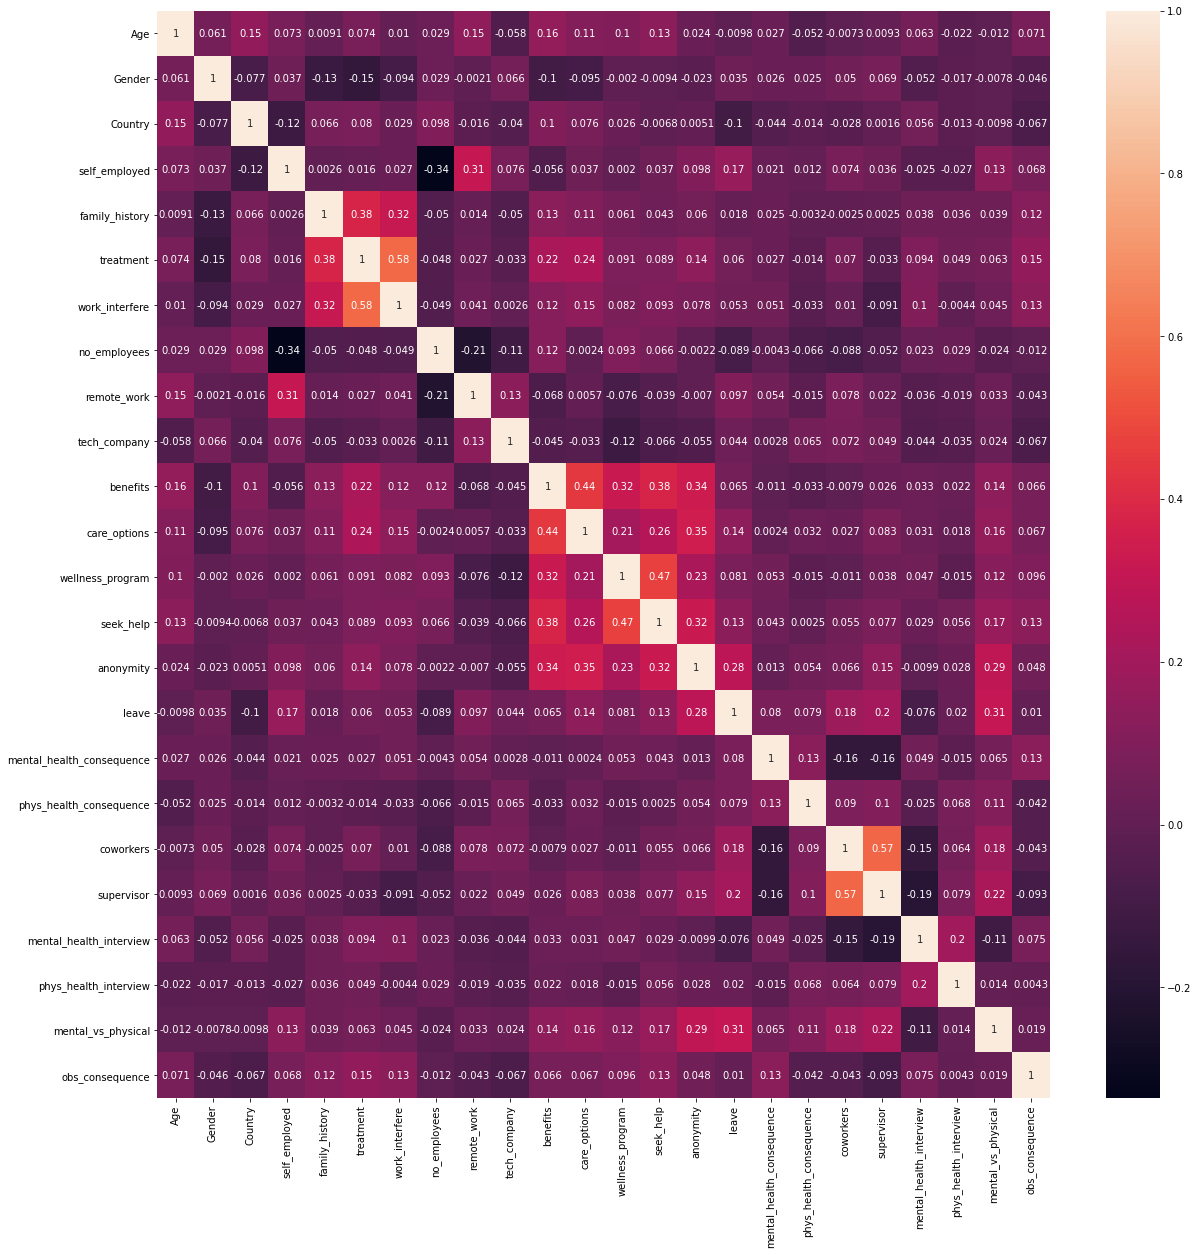

In [44]:
#Run the correlation heatmap
#dataplot =sns.heatmap(dfencode.corr(), cmap=cmap, figsize=(15,15),annot=True)
#plt.show()

plt.subplots(figsize=(20,20))
sns.heatmap(dfencode.corr(), cbar =True, annot=True)



#As shown in the heatmap above, care options, benefits,
#family hstory,work interfere, obs consequence all have the highest positive correlation with treatment which is the target variable

In [45]:
#Family history
dfencode.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,0,44,0,0,1,2,4,0,1,...,2,2,1,1,1,2,1,0,2,0
1,44,1,44,0,0,0,3,5,0,0,...,0,0,0,1,0,0,1,1,0,0
2,32,1,6,0,0,0,3,4,0,1,...,0,1,1,1,2,2,2,2,1,0
3,31,1,43,0,1,1,2,2,0,1,...,1,1,2,2,1,0,0,0,1,1
4,31,1,44,0,0,0,0,1,1,1,...,0,0,1,1,1,2,2,2,0,0


Text(0, 0.5, 'Frequency')

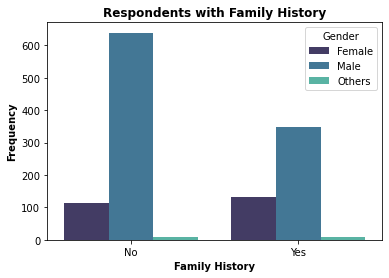

In [46]:
#plt.subplots(figsize=(12,12))
sns.countplot(data=data, x='family_history', hue='Gender', palette = 'mako')
plt.title('Respondents with Family History', fontweight='bold')
plt.xlabel('Family History', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')


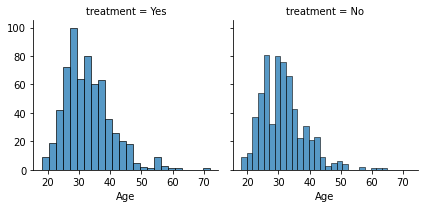

In [47]:
g=sns.FacetGrid(data, col='treatment', palette='crest')
g.map(sns.histplot, "Age")

Text(0.5, 1.0, 'Gender and Treatment')

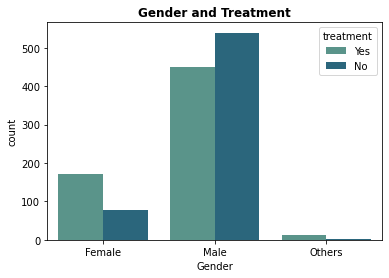

In [48]:
sns.countplot(data=data, x='Gender', hue='treatment', palette = 'crest')
plt.title('Gender and Treatment', fontweight='bold')

Text(0.5, 1.0, 'Family History and Treatment')

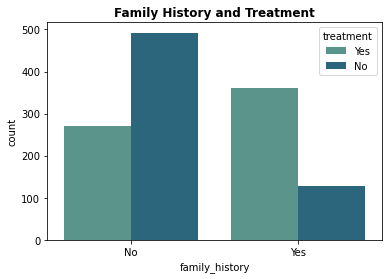

In [49]:
#data.hist(bins=10 , figsize=(20,15), color = 'blue')
sns.countplot(data=data, x='family_history', hue='treatment', palette = 'crest')
plt.title('Family History and Treatment', fontweight='bold')


Text(0.5, 1.0, 'Care Options and Treatment')

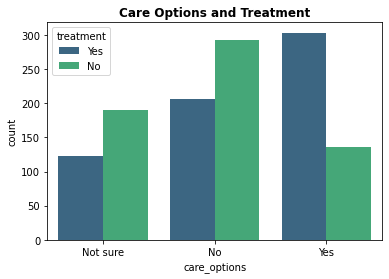

In [50]:
sns.countplot(data=data, x='care_options', hue='treatment', palette = 'viridis')
plt.title('Care Options and Treatment', fontweight='bold')
#A higher number of those that knows the options for mental health care that their employer
#provides goes for treatment

Text(0.5, 1.0, 'Benefit and Treatment')

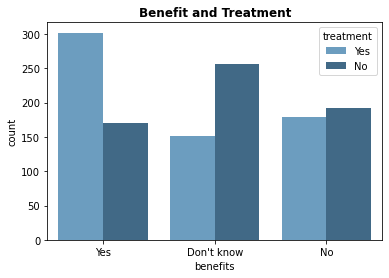

In [51]:
sns.countplot(data=data, x='benefits', hue='treatment', palette= 'Blues_d')
plt.title('Benefit and Treatment', fontweight='bold')
#A higher number of those whose employers provide mental health benefits, go for treatment

<AxesSubplot:xlabel='remote_work', ylabel='treatment'>

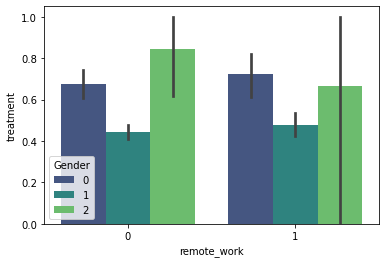

In [52]:
sns.barplot(data=dfencode, x='remote_work', y='treatment', hue='Gender', palette='viridis')


Text(0.5, 1.0, 'Does your mental health condition interferes with your work?')

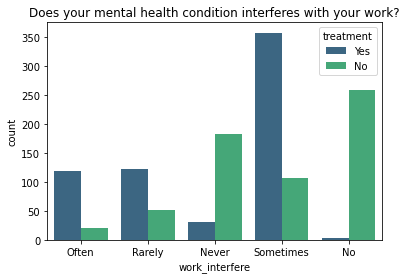

In [53]:
#plt.subplots(20,20)
sns.countplot(data=data, x='work_interfere', hue='treatment', palette='viridis')
plt.title('Does your mental health condition interferes with your work?')

Text(0.5, 1.0, 'Do you go for mental health treatment?')

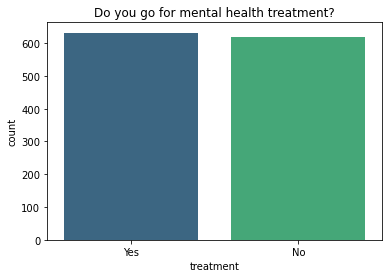

In [54]:
sns.countplot(data=data, x='treatment',palette='viridis')
plt.title('Do you go for mental health treatment?')

Text(0.5, 1.0, 'Country of Respondents')

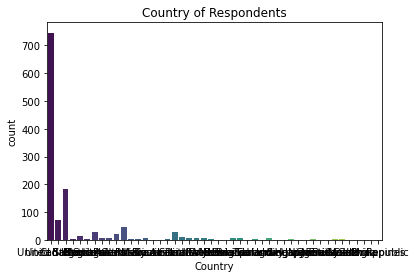

In [55]:
sns.countplot(data=data, x='Country',palette='viridis')
plt.title('Country of Respondents')

In [56]:
#I created a new column and label encoded the gender column named gender_N
data['Gender_N'] = le.fit_transform(data['Gender'])
data.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Gender_N
0,37,Female,United States,IL,No,No,Yes,Often,6-25,No,...,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN,0
1,44,Male,United States,IN,No,No,No,Rarely,More than 1000,No,...,Maybe,No,No,No,No,No,Don't know,No,NaN,1
2,32,Male,Canada,NaN,No,No,No,Rarely,6-25,No,...,No,No,Yes,Yes,Yes,Yes,No,No,NaN,1
3,31,Male,United Kingdom,NaN,No,Yes,Yes,Often,26-100,No,...,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,1
4,31,Male,United States,TX,No,No,No,Never,100-500,Yes,...,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,1


Text(0.5, 1.0, 'Gender of Respondents')

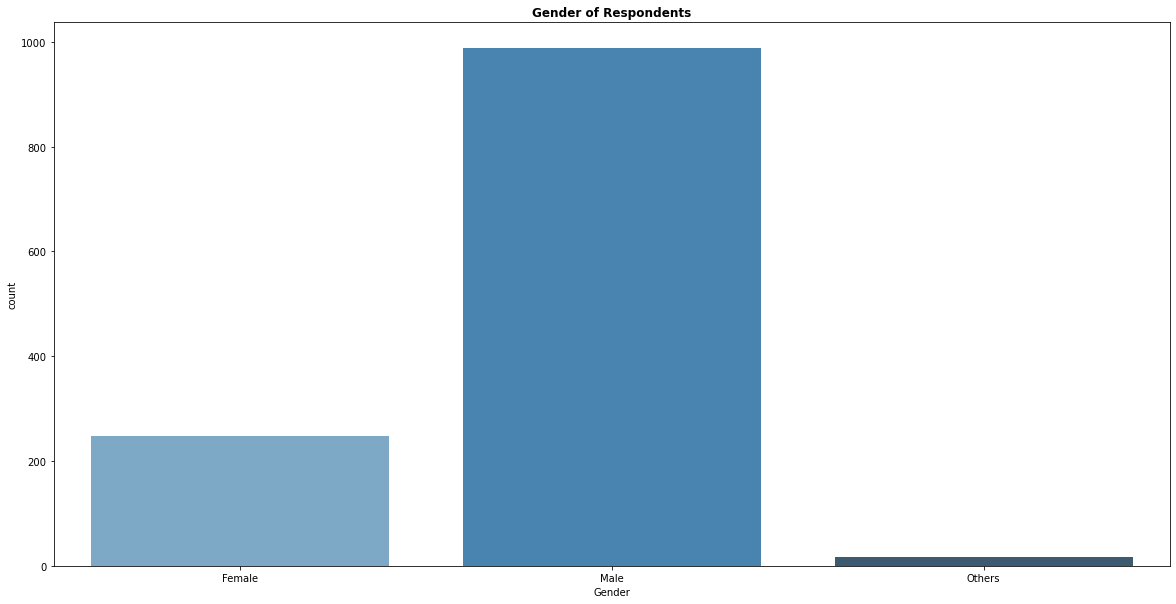

In [57]:
plt.subplots(figsize=(20,10))
sns.countplot(data=data, x='Gender', palette='Blues_d')
plt.title('Gender of Respondents', fontweight='bold')

Text(0.5, 1.0, 'Do you work in a Tech Company?')

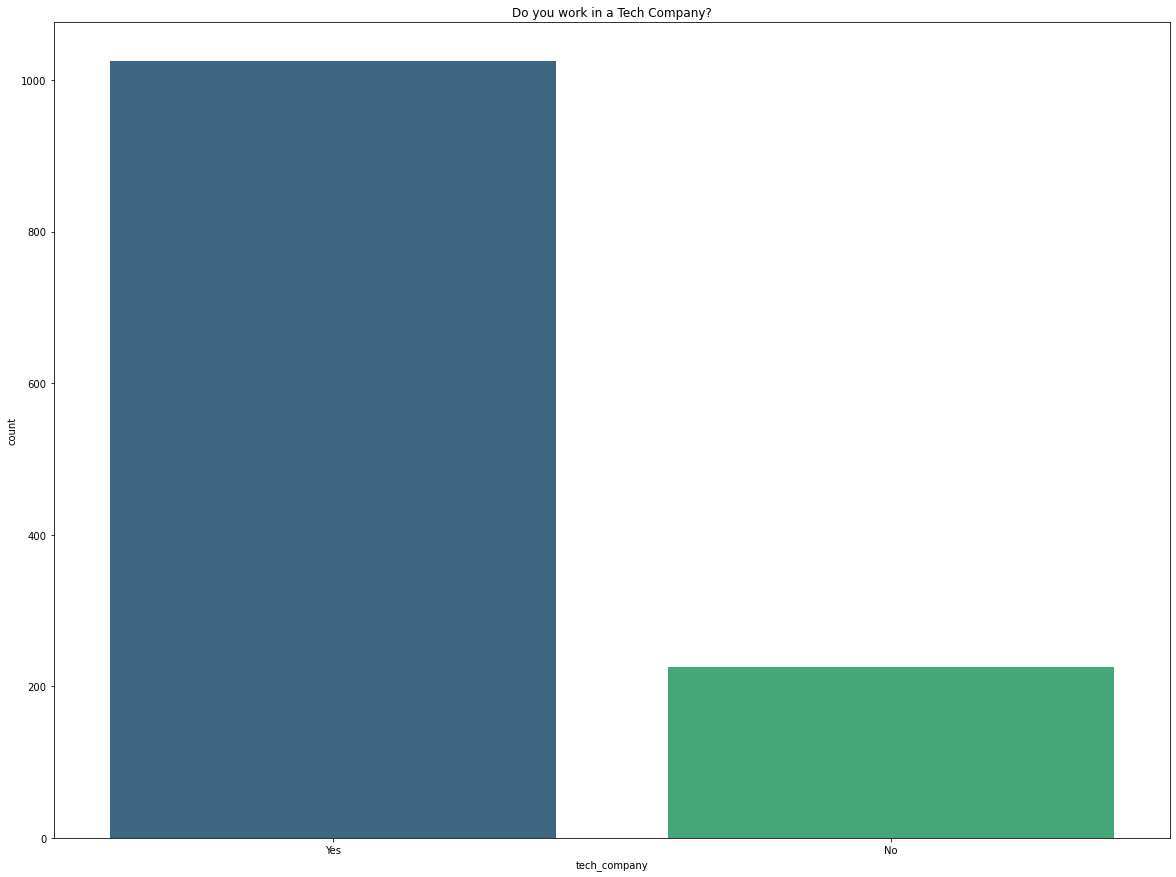

In [58]:
plt.subplots(figsize=(20,15))
sns.countplot(data=data, x='tech_company', palette='viridis')
plt.title('Do you work in a Tech Company?')

Text(0.5, 1.0, 'Is your employer primarily a tech company/organization')

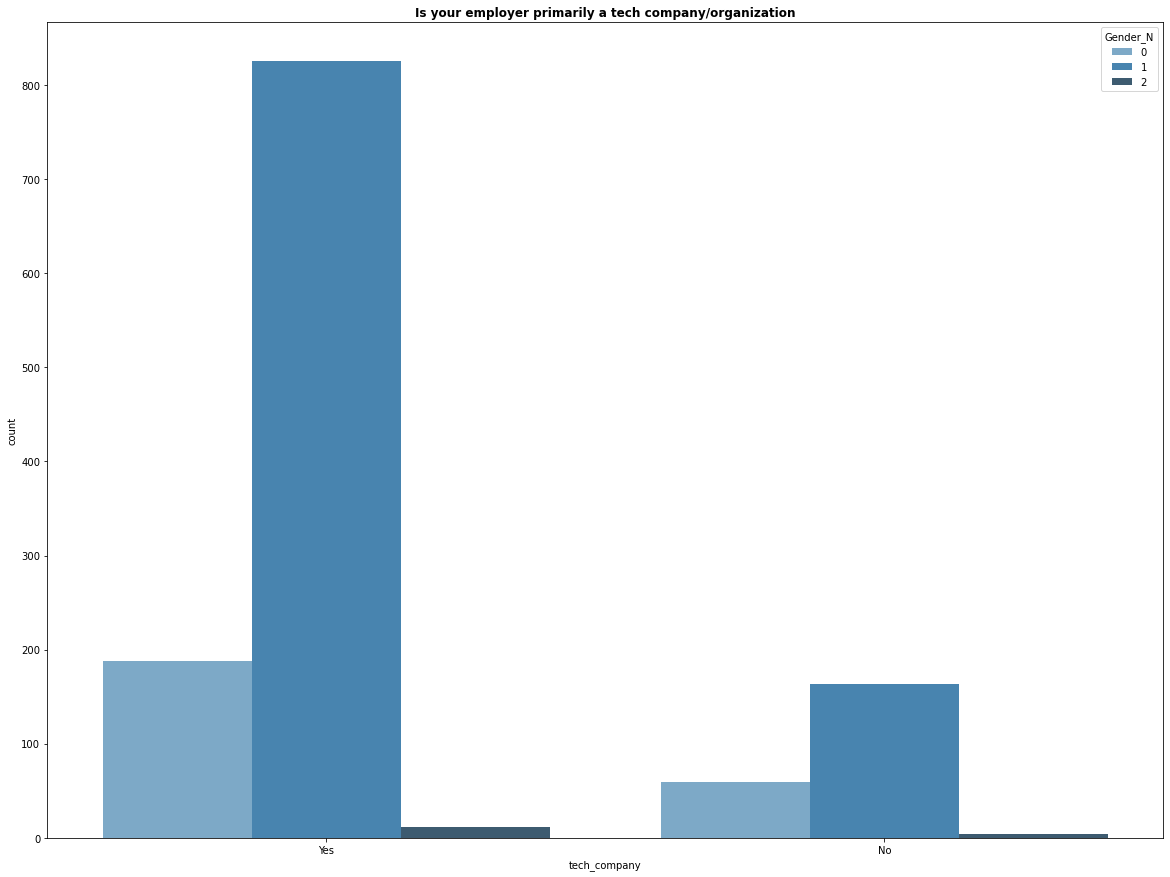

In [59]:
plt.subplots(figsize=(20,15))
sns.countplot(data=data, x='tech_company', hue='Gender_N', palette='Blues_d')
plt.title('Is your employer primarily a tech company/organization', fontweight='bold')
#the trend highlighted in the chart below shows that there is gender inequality because the majority of male respondents
#work in a tech company, although the majority of the respondents are male.
#This leads to the fact that, although the survey was targeted on tech workers, male gender still dominate
#the tech sector

In [65]:
data.to_csv("mentalhealthsurveyy.csv", encoding="utf-8")

In [62]:
data.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Gender_N
0,37,Female,United States,IL,No,No,Yes,Often,6-25,No,...,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN,0
1,44,Male,United States,IN,No,No,No,Rarely,More than 1000,No,...,Maybe,No,No,No,No,No,Don't know,No,NaN,1
2,32,Male,Canada,NaN,No,No,No,Rarely,6-25,No,...,No,No,Yes,Yes,Yes,Yes,No,No,NaN,1
3,31,Male,United Kingdom,NaN,No,Yes,Yes,Often,26-100,No,...,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,1
4,31,Male,United States,TX,No,No,No,Never,100-500,Yes,...,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,1
